#Retrive data menggunakan API Kaggle

## Mempersiapkan Data Kaggle dengan menggunakan Google Collab

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"iqbalbiondy","key":"900fcd77acd33f89c325fa10d951c109"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
 !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                  9KB  2022-10-06 08:55:25          12099        384  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset           11KB  2022-09-30 04:05:11           9675        298  1.0              
stetsondone/video-game-sales-by-genre                           Video Game Sales by Genre                        12KB  2022-10-31 17:56:01           1048         25  1.0              
whenamancodes/credit-card-customers-prediction                  Credit Card Cust

In [ ]:
#Import library
import os
import pandas as pd
import numpy as np
import urllib.request
import json
from datetime import datetime
import sqlite3

Menambahkan fungsi logging yang bertujuan untuk menghapus baris kode ketika sedang melakukan logging. Adapun untuk penulisannya loggingnya dibuat dalam format berikut 

[Tanggal] Deskripsi aktivitas

In [ ]:
#Fungsi untuk Logging
def log(msg):
  timestamp_format = '%d-%h-%Y %H:%M:%S'
  timestamp = datetime.now().strftime(timestamp_format)
  with open('logfile.txt','a') as f:
    f.write(f'[{timestamp}] {msg}\n'.format(timestamp, msg))

# Extract

In [ ]:
## DATA INDIAN WATER QUALITY

In [ ]:
! kaggle datasets download -d anbarivan/indian-water-quality-data

  0% 0.00/44.8k [00:00<?, ?B/s]
100% 44.8k/44.8k [00:00<00:00, 27.3MB/s]


In [ ]:
!unzip indian-water-quality-data.zip -d .kaggle 

Archive:  indian-water-quality-data.zip
  inflating: .kaggle/water_dataX.csv  


In [ ]:
## DATA INDIAN AIR QUALITY

In [ ]:
!kaggle datasets download -d shrutibhargava94/india-air-quality-data

  0% 0.00/5.22M [00:00<?, ?B/s]
100% 5.22M/5.22M [00:00<00:00, 171MB/s]


In [ ]:
!unzip india-air-quality-data.zip -d .kaggle 

Archive:  india-air-quality-data.zip
  inflating: .kaggle/data.csv        


In [ ]:
## Data Indian Earthquake

In [ ]:
!kaggle datasets download -d parulpandey/indian-earthquakes-dataset2018-onwards

  0% 0.00/51.3k [00:00<?, ?B/s]
100% 51.3k/51.3k [00:00<00:00, 26.5MB/s]


In [ ]:
!unzip indian-earthquakes-dataset2018-onwards.zip -d .kaggle 

Archive:  indian-earthquakes-dataset2018-onwards.zip
  inflating: .kaggle/Indian_earthquake_data.csv  


In [ ]:
## Data India Covid-19

In [ ]:
!kaggle datasets download -d chetansharma0402/covid19-data-of-india

  0% 0.00/17.7k [00:00<?, ?B/s]
100% 17.7k/17.7k [00:00<00:00, 15.3MB/s]


In [ ]:
!unzip covid19-data-of-india.zip -d .kaggle

Archive:  covid19-data-of-india.zip
  inflating: .kaggle/README.md       
  inflating: .kaggle/covid_cases.csv  
  inflating: .kaggle/covid_cases.json  
  inflating: .kaggle/update.py       


## Preparing data

In [ ]:
import pandas as pd


In [ ]:
log('Fase Extract dimulai')

In [ ]:
df_indiaAir = pd.read_csv(r"/content/.kaggle/data.csv",encoding='cp1252')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_indiaWater = pd.read_csv(r"/content/.kaggle/water_dataX.csv",encoding='cp1252')

In [ ]:
df_earthquake = pd.read_csv(r"/content/indian-earthquakes-dataset2018-onwards.zip")

In [ ]:
def extract(json_temp, filename):
  log(f"Extract dari file {filename[:-5]} dan membuat file {filename}")
  n_pages = json_temp['info']['pages']
  url = json_temp['info']['next'][:-1]
  total_data = []
  for i in range(1,n_pages+1):
    link = url+str(i)
    data = json.loads(urllib.request.urlopen(link).read())
    total_data += data['results']
  with open(filename,'a') as f:
    f.write(json.dumps(total_data))
  os.remove(filename[:-5])
  return (pd.DataFrame(total_data))

In [ ]:
import json

with open('/content/.kaggle/covid_cases.json') as file: indiaCovid19=json.load(file)
    
timestamp=[]
cases=[]

for i in indiaCovid19:
    temp = indiaCovid19[i]
    i = int(i)
    timestamp.append(i)
    cases.append(int(temp))
    
print("Timestamp list:- "+str(timestamp))
print("Cases list:- "+str(cases))

Timestamp list:- [1580342400, 1580428800, 1580515200, 1580601600, 1580688000, 1580774400, 1580860800, 1580947200, 1581033600, 1581120000, 1581206400, 1581292800, 1581379200, 1581465600, 1581552000, 1581638400, 1581724800, 1581811200, 1581897600, 1581984000, 1582070400, 1582156800, 1582243200, 1582329600, 1582416000, 1582502400, 1582588800, 1582675200, 1582761600, 1582848000, 1582934400, 1583020800, 1583107200, 1583193600, 1583280000, 1583366400, 1583452800, 1583539200, 1583625600, 1583712000, 1583798400, 1583884800, 1583971200, 1584057600, 1584144000, 1584230400, 1584316800, 1584403200, 1584489600, 1584576000, 1584662400, 1584748800, 1584835200, 1584921600, 1585008000, 1585094400, 1585180800, 1585267200, 1585353600, 1585440000, 1585526400, 1585612800, 1585699200, 1585785600, 1585872000, 1585958400, 1586044800, 1586131200, 1586217600, 1586304000, 1586390400, 1586476800, 1586563200, 1586649600, 1586736000, 1586822400, 1586908800, 1586995200, 1587081600, 1587168000, 1587254400, 1587340800

In [ ]:
import pandas as pd
import json
with open('/content/.kaggle/covid_cases.json') as f:
  js_covid = json.load(f)
print(js_covid)
df_indiaCovid19 = pd.DataFrame(js_covid, index=[0]).transpose()

{'1580342400': 1, '1580428800': 1, '1580515200': 1, '1580601600': 2, '1580688000': 3, '1580774400': 3, '1580860800': 3, '1580947200': 3, '1581033600': 3, '1581120000': 3, '1581206400': 3, '1581292800': 3, '1581379200': 3, '1581465600': 3, '1581552000': 3, '1581638400': 3, '1581724800': 3, '1581811200': 3, '1581897600': 3, '1581984000': 3, '1582070400': 3, '1582156800': 3, '1582243200': 3, '1582329600': 3, '1582416000': 3, '1582502400': 3, '1582588800': 3, '1582675200': 3, '1582761600': 3, '1582848000': 3, '1582934400': 3, '1583020800': 3, '1583107200': 5, '1583193600': 6, '1583280000': 28, '1583366400': 30, '1583452800': 31, '1583539200': 34, '1583625600': 39, '1583712000': 48, '1583798400': 63, '1583884800': 71, '1583971200': 81, '1584057600': 91, '1584144000': 102, '1584230400': 112, '1584316800': 126, '1584403200': 146, '1584489600': 171, '1584576000': 198, '1584662400': 256, '1584748800': 334, '1584835200': 403, '1584921600': 497, '1585008000': 571, '1585094400': 657, '1585180800':

In [ ]:
df_indiaCovid19.columns=['no_cases']


In [ ]:
df_indiaCovid19

,no_cases
1580342400,1
1580428800,1
1580515200,1
1580601600,2
1580688000,3
...,...
1624233600,29976849
1624320000,30027666
1624406400,30081975
1624492800,30133634


In [ ]:
log('Fase Extract selesai')

In [ ]:
df_indiaWater

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


In [ ]:
df_indiaAir

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_earthquake

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India"
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India"
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India"
3,2021-07-30 13:56:31 IST,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana"
4,2021-07-30 07:19:38 IST,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan"
...,...,...,...,...,...,...
2714,2019-08-04 06:56:19 IST,12.30,94.80,10.0,4.8,"224km ESE of Diglipur, Andaman and Nicobar isl..."
2715,2019-08-04 05:40:33 IST,24.70,94.30,40.0,4.1,"31km SW of Ukhrul, Manipur, India"
2716,2019-08-03 16:29:37 IST,22.50,88.10,10.0,3.6,"28km WSW of Kolkata, India"
2717,2019-08-03 01:59:11 IST,24.60,94.20,54.0,3.5,"35km SE of Imphal, Manipur, India"


Mengimport seluruh library yang akan dipakai pada proses selanjutnya

# Transform

## Rencana Database

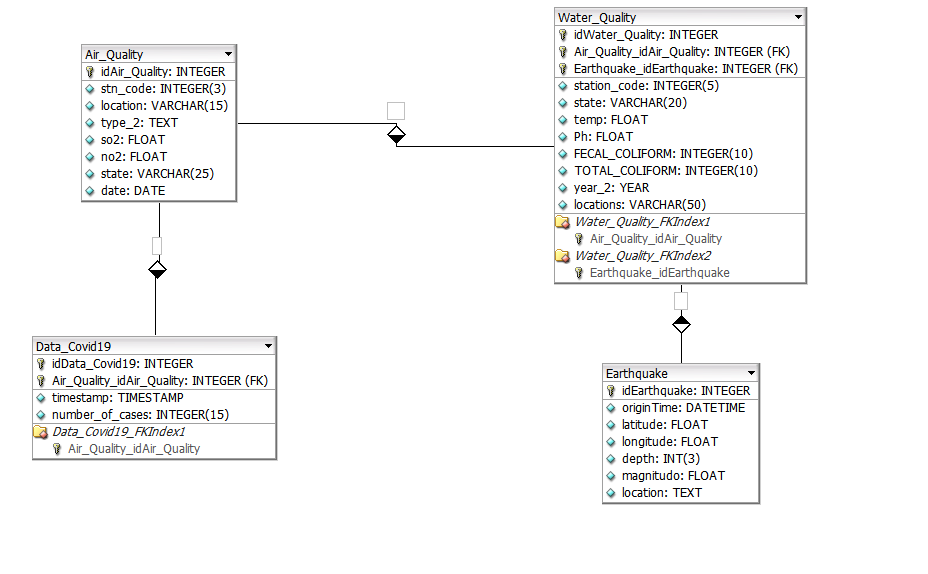

## Hapus Kolom

> Pada proses tranform, hal yang dilakukan pertama kali adalah menghapus kolom yang tidak relevan yang terdapat dalam dataframe




In [ ]:
log("Fase Transform dimulai")
#Hapus kolom tidak sesuai dengan rancangan database
def hapusKolom(columns,df, nama_df):
  for column in columns:
    if column in df.columns:
      log(f'Hapus kolom {column} dari DataFrame {nama_df}')
      df = df.drop(columns=[column])
  return df

df_indiaAir = hapusKolom(['sampling_date','agency','rspm','spm','location_monitoring_station','pm2_5'], df_indiaAir, "indiaAirQuality")
df_indiaWater = hapusKolom(['D.O. (mg/l)','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)'], df_indiaWater, "indiaWaterQuality")



In [ ]:
df_indiaAir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   stn_code  291665 non-null  object 
 1   state     435742 non-null  object 
 2   location  435739 non-null  object 
 3   type      430349 non-null  object 
 4   so2       401096 non-null  float64
 5   no2       419509 non-null  float64
 6   date      435735 non-null  object 
dtypes: float64(2), object(5)
memory usage: 23.3+ MB


In [ ]:
df_indiaWater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   STATION CODE                    1991 non-null   object
 1   LOCATIONS                       1991 non-null   object
 2   STATE                           1991 non-null   object
 3   Temp                            1991 non-null   object
 4   PH                              1991 non-null   object
 5   FECAL COLIFORM (MPN/100ml)      1991 non-null   object
 6   TOTAL COLIFORM (MPN/100ml)Mean  1991 non-null   object
 7   year                            1991 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 124.6+ KB


In [ ]:
df_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Origin Time  2719 non-null   object 
 1   Latitude     2719 non-null   float64
 2   Longitude    2719 non-null   float64
 3   Depth        2719 non-null   float64
 4   Magnitude    2719 non-null   float64
 5   Location     2719 non-null   object 
dtypes: float64(4), object(2)
memory usage: 127.6+ KB


In [ ]:
df_indiaCovid19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 1580342400 to 1624579200
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   no_cases  513 non-null    int64
dtypes: int64(1)
memory usage: 8.0+ KB


## Rename Kolom

In [ ]:
def renameColumns(dict_column, df,df_name):
  oldcolumn = ','.join(dict_column.keys())
  newcolumn = '.'.join(dict_column.values())
  log(f"Rename Column [{oldcolumn}] to [{newcolumn}] in DataFrame {df_name}")
  df=df.rename(columns = dict_column)
  return df

df_indiaWater=renameColumns({'STATION CODE':'STATION_CODE','FECAL COLIFORM (MPN/100ml)':'FECAL_COLIFORM','TOTAL COLIFORM (MPN/100ml)Mean':'TOTAL_COLIFORM'},df_indiaWater,'India Water Quality')
df_earthquake=renameColumns({'Origin Time':'Origin_Time'},df_earthquake,'India Earthquake Info')

In [ ]:
df_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Origin_Time  2719 non-null   object 
 1   Latitude     2719 non-null   float64
 2   Longitude    2719 non-null   float64
 3   Depth        2719 non-null   float64
 4   Magnitude    2719 non-null   float64
 5   Location     2719 non-null   object 
dtypes: float64(4), object(2)
memory usage: 127.6+ KB


## Mengganti nilai kosong dengan null

In [ ]:
#Isi nilai kosong dengan null
def isiNull(df, nama_df, value):
  log(f"Mengganti nilai {(value if value!='' else 'kosong')} menjadi np.nan pada DataFrame {nama_df}")

  regex = r'^\s*$' if value=='' else fr'(?i)^{value}$'
  df = df.replace(regex, np.nan, regex=True)
  return df

df_indiaWater = isiNull(df_indiaWater, "indiaWaterQuality", '')
df_earthquake = isiNull(df_earthquake,'indiaEarthquake', '')
df_indiaAir = isiNull(df_indiaAir,'indiaAirQuality','')
df_indiaCovid19 = isiNull(df_indiaCovid19,'indiaCovid19','')



In [ ]:
df_indiaWater.isnull().sum()

STATION_CODE       0
LOCATIONS          0
STATE              0
Temp               4
PH                 0
FECAL_COLIFORM    13
TOTAL_COLIFORM    11
year               0
dtype: int64

In [ ]:
df_indiaAir.isnull().sum()

stn_code    144077
state            0
location         3
type          5393
so2          34646
no2          16233
date             7
dtype: int64

In [ ]:
df_indiaCovid19.isnull().sum()

no_cases    0
dtype: int64

In [ ]:
df_earthquake.isnull().sum()

Origin_Time    0
Latitude       0
Longitude      0
Depth          0
Magnitude      0
Location       0
dtype: int64

In [ ]:
log("Fase Transform selesai")

## Mengubah format tanggal



In [ ]:
#Convert format tanggal menjadi DD-Mon-YYYY
log("Mengubah format tanggal pada DataFrame India Air Quality menjadi DD-Mon-YYYY")

def convertDate(x):
  x = x.split()
  date = x[1][:-1] if (len(x[1][:-1]) > 1) else f"0{x[1][:-1]}"
  return "-".join([date, x[0][:3], x[2]])

  df_indiaAir['date'] = df_indiaAir['date'].apply(convertDate)

In [ ]:
df_indiaAir.head()

,stn_code,state,location,type,so2,no2,date
0,150.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,1990-02-01
1,151.0,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,1990-02-01
2,152.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,1990-02-01
3,150.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,1990-03-01
4,151.0,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,1990-03-01


# Load

Fase load ada 4 tahap yaitu:

1.   Melakukan koneksi database
2.   Membuat tabel tiap dataframe
3.   Mengisi data ke dalam tabel
4.   Menutup koneksi ke database



## Melakukan koneksi database dan membuat tabel tiap dataframe

In [ ]:
log('Fase pembuatan koneksi dan tabel database siap dimulai')
try:
  connection = sqlite3.connect('uts_iqbal.db')


  cursor = connection.cursor()
  log('membuat table India Air Quality')
  cursor.execute('''CREATE TABLE "IndiaAirQuality" (
      "stn_code"    VARCHAR(100),
      "state"       TEXT,
      "location"    TEXT,
      "type"        VARCHAR(25),
      "so2"          Float,
      "no2"          Float,
      "date"          VARCHAR(15)
  );''')
  connection.commit()


  log('memasukkan data dari dataframe df_indiaAir kedalam table IndiaAirQuality')
  df_indiaAir.to_sql('IndiaAirQuality', con=connection, if_exists='append',index=False)

  # ====================================

  log('membuat table India Water Quality')
  cursor.execute('''CREATE TABLE "IndiaWaterQuality" (
      "STATION_CODE"              VARCHAR,
      "LOCATIONS"                VARCHAR,
      "STATE"                   TEXT,
      "Temp"                  VARCHAR,
      "PH"                    VARCHAR,
      "FECAL_COLIFORM"        TEXT,
      "TOTAL_COLIFORM"     TEXT,
      "year"                INTEGER
  );''')
  connection.commit()
  log('memasukkan data dari dataframe indiaWater kedalam table IndiaWaterQuality')
  df_indiaWater.to_sql('IndiaWaterQuality', con=connection,if_exists='append',index=False)
# ====================================

  log('membuat tabel India Earthquake Info')
  cursor.execute('''CREATE TABLE "IndiaEarthquake" (
      "Origin_Time"              VARCHAR,
      "Latitude"                 FLOAT,
      "Longitude"                 FLOAT,
      "Depth"                     FLOAT,
      "Magnitude"                 FLOAT,
      "Location"                  VARCHAR
  );''')
  connection.commit()
  log('memasukkan data dari dataframe earthquake kedalam table IndiaEarthquake')
  df_earthquake.to_sql('IndiaEarthquake', con = connection, if_exists='append', index=False)
  # ====================================

  log('membuat tabel India Covid-19 Info')
  cursor.execute('''CREATE TABLE "IndiaCovid19" (
      "no_cases"           INTEGER
  );''')
  connection.commit()
  log('memasukkan data dari dataframe indiaCovid19 kedalam table IndiaCovid19')
  df_indiaCovid19.to_sql('IndiaCovid19',con=connection,if_exists='append',index=False)



except sqlite3.Error as err:
  print('Error while connecting to sqlite3', err)
finally:
  if connection:
    connection.close()
    print('koneksi sqlite3 berhasil ditutup')

log('database berhasil dibuat')
log('proses Load selesai')

koneksi sqlite3 berhasil ditutup


# Insert Data

In [ ]:
#insert
try:
  print("koneksi db dibuka")
  connection = sqlite3.connect('uts_iqbal.db')

  cursor = connection.cursor()
  log('Proses insert data ke dalam tabel database berhasil dibuka')
  log('proses insert data ke dalam table IndiaAirQuality')
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaAirQuality;"""
  )
  records = cursor.fetchall()
  print('jumlah kolom sebelum proses insert data dari table IndiaAirQuality: ', records)

  cursor.execute(
      """INSERT INTO IndiaAirQuality (stn_code,state,location,type,so2,no2,date)
    VALUES 
      ('20221112','Batam','Tanjung_Uncang','type21',44.5,33.1,'11/12/2022'),
      ('20221113','Malang','Lowokwaru','type22',45.5,31.1,'10/12/2022'),
      ('20221114','Batu','Central','type19',35.5,20.1,'19/12/2021');"""
  )
  connection.commit()

  cursor.execute(
      """SELECT COUNT(*) FROM IndiaAirQuality;"""
  )
  records = cursor.fetchall()
  print('jumlah kolom sesudah proses insert data dari table IndiaAirQuality: ', records)
  print("")
  ############################################################
  log('proses insert data ke dalam table IndiaWaterQuality')
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaWaterQuality;"""
  )
  records = cursor.fetchall()
  print('jumlah kolom sebelum proses insert data dari IndiaWaterQuality: ', records)

  cursor.execute(
      """INSERT INTO IndiaWaterQuality (STATION_CODE,LOCATIONS,STATE,Temp,PH,FECAL_COLIFORM,TOTAL_COLIFORM,year)
    VALUES 
      ('12345','Dinoyo','Jatim','30.1','20.1','22.1','19.1',2019),
      ('56789','Malang','Jatim','20.1','10.1','32.1','29.1',2020),
      ('10112','Batam','Kepri','40.1','30.1','42.1','89.1',2021);"""
  )
  connection.commit()

  cursor.execute(
      """SELECT COUNT(*) FROM IndiaWaterQuality;"""
  )
  records = cursor.fetchall()
  print('jumlah kolom sesudah proses insert data dari table IndiaWaterQuality : ', records)
  print('')

  #######################################################
  log('insert data to table IndiaEarthquake')
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaEarthquake;"""
  )
  records = cursor.fetchall()
  print('Sum of columns before adding new row into table IndiaEarthquake: ', records)

  cursor.execute(
      """INSERT INTO IndiaEarthquake (Origin_Time,Latitude,Longitude,Depth,Magnitude,Location)
    VALUES 
      ('11/12/2002 19:10:20',32.1,4.5,1.2,3.3,'Malang'),
      ('12/11/2003 20:10:20',42.1,5.5,2.2,4.3,'Dinoyo'),
      ('13/10/2004 21:10:20',52.1,6.5,3.2,5.3,'Suhat');"""
  )
  connection.commit()

  cursor.execute(
      """SELECT COUNT(*) FROM IndiaEarthquake;"""
  )
  records = cursor.fetchall()
  print('Sum of columns before adding new row IndiaEarthquake: ', records)
  print('')

  #########################################################
  log('insert data to table IndiaCovid19')
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaCovid19;"""
  )
  records = cursor.fetchall()
  print('Sum of columns before adding new row into table IndiaCovid19: ', records)

  cursor.execute(
      """INSERT INTO IndiaCovid19 (no_cases)
    VALUES 
      (12345),
      (56789),
      (10112);"""
  )
  connection.commit()

  cursor.execute(
      """SELECT COUNT(*) FROM IndiaCovid19;"""
  )
  records = cursor.fetchall()
  print('Sum of columns before adding new row IndiaCovid19: ', records)
except sqlite3.Error as err:
  print('Error while connecting to sqlite3', err)
finally:
  if connection:
    connection.close()
    print('connection closed')

koneksi db dibuka
jumlah kolom sebelum proses insert data dari table IndiaAirQuality:  [(435742,)]
jumlah kolom sesudah proses insert data dari table IndiaAirQuality:  [(435745,)]

jumlah kolom sebelum proses insert data dari IndiaWaterQuality:  [(1991,)]
jumlah kolom sesudah proses insert data dari table IndiaWaterQuality :  [(1994,)]

Sum of columns before adding new row into table IndiaEarthquake:  [(2719,)]
Sum of columns before adding new row IndiaEarthquake:  [(2722,)]

Sum of columns before adding new row into table IndiaCovid19:  [(513,)]
Sum of columns before adding new row IndiaCovid19:  [(516,)]
connection closed


# Update Data

In [ ]:
#update
try:
  connection = sqlite3.connect('uts_iqbal.db')

  cursor = connection.cursor()
  log('Update data started!')
  cursor.execute(
      """SELECT * FROM IndiaAirQuality WHERE so2 < 3.5;"""
  )
  rec = cursor.fetchall()
  print('Data in table IndiaAirQuality before update', rec)
  for data in rec:
    print(data)
  
  log('update data stn_code where so2 < 3.5')
  cursor.execute(
      """UPDATE IndiaAirQuality
      SET 
          stn_code = '300'
      WHERE 
          so2 < 3.5;"""
  )
  connection.commit()
  cursor.execute(
      """SELECT * FROM IndiaAirQuality WHERE so2 < 3.5;"""
  )
  rec = cursor.fetchall()
  print('Data in table IndiaAirQuality after update', rec)
  print('')

  ############################################
  cursor.execute(
      """SELECT * FROM IndiaWaterQuality WHERE year=2012;"""
  )
  rec = cursor.fetchall()
  print('Data in table IndiaWaterQuality before update', rec)
  for data in rec:
    print(data)
  
  log('update data where year=2012')
  cursor.execute(
      """UPDATE IndiaWaterQuality
      SET 
          STATE = 'GOA'
      WHERE 
          year=2012;"""
  )
  connection.commit()
  cursor.execute(
      """SELECT * FROM IndiaWaterQuality WHERE year=2012;"""
  )
  rec = cursor.fetchall()
  print('Data in table IndiaWaterQuality after update', rec)
  print('')
  for data in rec:
    print(data)
except sqlite3.Error as err:
  print("Error while connecting to sqlite3", err)
finally:
  if connection:
    connection.close()
    print('Connection is closed')
    log('Update data finished!')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
('416.0', 'Uttar Pradesh', 'Agra', 'Sensitive Area', 2.0, 19.0, '2011-03-30')
('416.0', 'Uttar Pradesh', 'Agra', 'Sensitive Area', 3.0, 21.0, '2011-01-04')
('416.0', 'Uttar Pradesh', 'Agra', 'Sensitive Area', 3.0, 17.0, '2011-07-04')
('416.0', 'Uttar Pradesh', 'Agra', 'Sensitive Area', 2.0, 18.0, '2011-04-21')
('416.0', 'Uttar Pradesh', 'Agra', 'Sensitive Area', 2.0, 28.0, '2011-04-28')
('416.0', 'Uttar Pradesh', 'Agra', 'Sensitive Area', 2.0, 24.0, '2011-01-05')
('416.0', 'Uttar Pradesh', 'Agra', 'Sensitive Area', 2.0, 16.0, '2011-05-05')
('416.0', 'Uttar Pradesh', 'Agra', 'Sensitive Area', 2.0, 19.0, '2011-08-05')
('416.0', 'Uttar Pradesh', 'Agra', 'Sensitive Area', 2.0, 27.0, '2011-05-16')
('416.0', 'Uttar Pradesh', 'Agra', 'Sensitive Area', 2.0, 27.0, '2011-05-20')
('416.0', 'Uttar Pradesh', 'Agra', 'Sensitive Area', 3.0, 28.0, '2011-05-24')
('416.0', 'Uttar Pradesh', 'Agra', 'Sensitive Area', 2.0, 13.0, '2011-05-30')
('416.0', 'Ut

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



('1703', 'GHAGGAR AT MOONAK', 'PUNJAB', '24', '7.4', '36250', '66250', 2012)
('1704', 'GHAGGAR AT D/S SARDULGARH', 'PUNJAB', '22', '7.4', '19000', '40500', 2012)
('1705', 'GHAGGAR AT U/S SARDULGARH', 'PUNJAB', '22', '7.4', '14750', '29500', 2012)
('1025', 'GHAGGAR GHNAN1 AT ROAD BRDG. SIRSA,DEBWALI ROAD', 'HARYANA', None, '7.9', None, None, 2012)
('1026', 'GHAGGAR GHNAN2 AT CHANDARPUR ', 'HARYANA', None, '7.8', None, None, 2012)
('1887', 'GHAGGAR BEFORE OTTU WEIR (BEFORE MIXING OF SATLUJ CANAL ', 'HARYANA', None, '8', None, None, 2012)
('1718', 'GAGGAR RIVER WHEN ENTERING IN RAJASTHAN FROM HARYANA NEAR RD NO. 629', 'RAJASTHAN', '33', '7.5', '3', '4', 2012)
('1871', 'RIVER MARKANDA AT PAONTA, DISTT. SIRMOUR', 'HIMACHAL PRADESH', '20', '7.4', '9', '19', 2012)
('2624', 'MARKANDA U/S KALA AMB', 'HIMACHAL PRADESH', '20', '7', '13', '22', 2012)
('2625', 'MARKANDA D/S KALA AMB/ BOUNDARY OF HARYANA', 'HIMACHAL PRADESH', '20', '7.7', '13', '23', 2012)
('1884', 'KALA AMB D/S MARKANDA RIVER', 'HA

# Delete Data

In [ ]:
#delete
try:
  connection = sqlite3.connect('uts_iqbal.db')

  cursor = connection.cursor()
  log('delete data started!')
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaAirQuality;"""
  )
  rec = cursor.fetchall()
  print('Data in table IndiaAirQuality before DELETE', rec)
  
  log('delete data from table IndiaAirQuality')
  cursor.execute(
      """DELETE FROM IndiaAirQuality
      WHERE 
          so2 < 3.5;"""
  )
  connection.commit()
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaAirQuality;"""
  )
  rec = cursor.fetchall()
  print('Data in table IndiaAirQuality after DELETE', rec)
  print('')

  ######################################
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaWaterQuality;"""
  )
  rec = cursor.fetchall()
  print('Data in table IndiaWaterQuality before DELETE', rec)
  
  log('delete data from table IndiaWaterQuality')
  cursor.execute(
      """DELETE FROM IndiaWaterQuality
      WHERE 
          year=2012;"""
  )
  connection.commit()
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaWaterQuality;"""
  )
  rec = cursor.fetchall()
  print('Data in table IndiaWaterQuality after DELETE', rec)
  print('')
  ##################################

  cursor.execute(
      """SELECT COUNT(*) FROM IndiaEarthquake;"""
  )
  rec = cursor.fetchall()
  print('Data in table IndiaEarthquake before DELETE', rec)
  
  log('delete data from table IndiaEarthquake')
  cursor.execute(
      """DELETE FROM IndiaEarthquake
      WHERE 
         Depth=32.1;"""
  )
  connection.commit()
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaEarthquake;"""
  )
  rec = cursor.fetchall()
  print('Data in table IndiaEarthquake after DELETE', rec)
except sqlite3.Error as err:
  print("Error while connecting to sqlite3", err)
finally:
  if connection:
    connection.close()
    print('Connection is closed')
    log('DELETE data finished!')

Data in table IndiaAirQuality before DELETE [(435745,)]
Data in table IndiaAirQuality after DELETE [(370889,)]

Data in table IndiaWaterQuality before DELETE [(1994,)]
Data in table IndiaWaterQuality after DELETE [(1702,)]

Data in table IndiaEarthquake before DELETE [(2722,)]
Data in table IndiaEarthquake after DELETE [(2722,)]
Connection is closed


# Count Data

In [ ]:
#count
try:
  connection = sqlite3.connect('uts_iqbal.db')

  cursor = connection.cursor()
  log('COUNT data started!')
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaAirQuality WHERE stn_code ='20221112';"""
  )
  record = cursor.fetchall()
  print('jumlah stn_code 20221112 adalah: ',record[0][0])

  ########################
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaWaterQuality WHERE STATE ='Jatim';"""
  )
  record = cursor.fetchall()
  print('jumlah state = jatim adalah ',record[0][0])

  ########################
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaEarthquake WHERE Magnitude =5.3;"""
  )
  record = cursor.fetchall()
  print('Jumalh data yang magnitude nya 5.3 adalah ',record[0][0])

  ########################
  cursor.execute(
      """SELECT COUNT(*) FROM IndiaCovid19 WHERE no_cases =12345;"""
  )
  record = cursor.fetchall()
  print('jumlah nomor kasus 12345 adalah',record[0][0])
except sqlite3.Error as err:
  print('Error while connecting to sqlite3', err)
finally:
  if connection:
    connection.close()
    print('connection closed')
    log('COUNT data finished')

jumlah stn_code 20221112 adalah:  1
jumlah state = jatim adalah  2
Jumalh data yang magnitude nya 5.3 adalah  17
jumlah nomor kasus 12345 adalah 1
connection closed
